In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> # **EDA PART**

> **Loading the Data set to the data frame using pd.read_csv method and checking the first  10 Columns of the data to get an over look of the data**

In [3]:
Lc = pd.read_csv('/kaggle/input/loan-dataset/loan_lending.csv')
Lc.head(10)



,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0
5,9856168,E,45600,1,0,MORTGAGE,1.50,medical,60 months,0,NaN,14.6,0.0,0.308410,1
6,9825536,B,45000,0,5,MORTGAGE,18.69,debt_consolidation,36 months,0,NaN,29.5,0.0,0.045062,1
7,7450630,D,96000,1,1,RENT,6.41,other,36 months,0,NaN,55.9,0.0,0.238576,0
8,9767996,G,60000,0,11,MORTGAGE,26.27,medical,60 months,0,NaN,94.1,0.0,0.674835,0
9,9858164,A,130000,0,3,MORTGAGE,14.60,medical,36 months,1,NaN,82.7,0.0,0.782383,0


>  **Using info() method to check the data type  , no.of columns  , no of rows of the data set**

In [114]:
Lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  int64  
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

> **Describe() is used to do the statistical analysis of the data here we can also check the outliers in the data by looking at the numerical columns. Here i have only performed the
> Describe() on the numerical columns if you want you can use Describe(include =all) to the data of all text columns also.**

In [115]:
Lc.describe()

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


> **As in above i have found the outlier in the "annual_inc" column which is 1000000 so we use the box plot graphically using sns.boxplot() as we can see in the plot.**

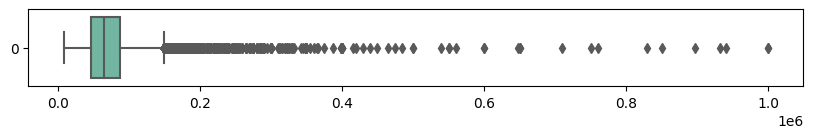

In [116]:
plt.figure(figsize=(10,1))
sns.boxplot(data=Lc['annual_inc'],orient='h',palette = 'Set2')
plt.show()

> **You can see the differnce between above box plot and below one without outliers using INTERNAL QUARTILE RANGE (IQR) that  i will  be describing below**

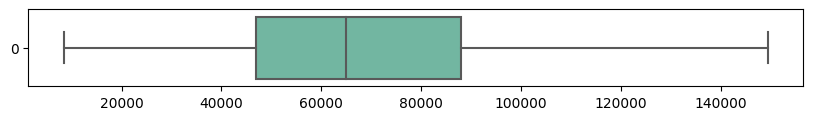

In [125]:
plt.figure(figsize=(10,1))
sns.boxplot(data=Lc['annual_inc_Olfree'],orient='h',palette = 'Set2')
plt.show()

> **Step 1 (IQR): to calculate the q3 that is the 75% of data using quantile.(0.75)**

In [118]:
q3 = Lc['annual_inc'].quantile(0.75)
q3

88000.0

> **Step 2 (IQR): to calculate the q1 that is the 25% of data using quantile.(0.25)**

In [119]:
q1 = Lc['annual_inc'].quantile(0.25)
q1

47000.0

> **Step 3 (IQR): to calculate the IQR **

In [120]:
IQR = q3-q1
IQR

41000.0

> **Step 4 (IQR) = to calculate the lower and the upper range.**

In [121]:
lower_range = q1-(1.5*IQR)
Upper_range = q3+(1.5*IQR)

lower_range


-14500.0

In [122]:
Upper_range

149500.0

> **In this step i have created an empty list annual_inc_Olfree[] below that
>  there is an function which will append all the values based on the condition i have used in order to get  outlier free anuual inc**

In [123]:
annual_inc_Olfree=[]
for i in Lc['annual_inc']:
    if (i<lower_range):
        annual_inc_Olfree.append(lower_range)
    elif i> Upper_range:
        annual_inc_Olfree.append(Upper_range)
    else:
        annual_inc_Olfree.append(i)

> **Adding the outlier free annual income in the original data set**

In [124]:
Lc['annual_inc_Olfree']= annual_inc_Olfree

> **As i have  very less data available in the column last_major_derog_none so i will be dropping this column as 97% data is missing**
**NOTE: Always remember if the data from a column is missing more than 6% you need to perform imputaion technique or go back to source**

In [81]:
Pct=round(Lc['last_major_derog_none'].isnull().sum()/(len(Lc)) * 100,1)
Pct

97.1

>  **I have calculated the mean here as i have some missing values in dti column (debt to equity ratio) so i use mean over here to calculate the mean and fill the na** **places**.

In [126]:
dti_dummy = Lc['dti'].fillna(Lc['dti'].mean())

In [127]:
Lc['dti_dummy']=dti_dummy
Lc

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,annual_inc_Olfree,dti_dummy
0,11454641,A,100000,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0,100000.0,26.27
1,9604874,A,83000,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0,83000.0,5.39
2,9684700,D,78000,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1,78000.0,18.45
3,9695736,D,37536,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1,37536.0,12.28
4,9795013,D,65000,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0,65000.0,11.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,6595657,B,27000,0,9,RENT,18.36,debt_consolidation,36 months,1,NaN,46.5,0.0,0.821782,1,27000.0,18.36
19996,1576331,B,45000,0,2,MORTGAGE,23.22,major_purchase,36 months,0,NaN,46.2,0.0,0.652200,0,45000.0,23.22
19997,6645736,B,104000,0,5,MORTGAGE,13.27,debt_consolidation,36 months,1,NaN,78.5,0.0,0.482555,0,104000.0,13.27
19998,6625736,A,38400,0,2,MORTGAGE,12.84,debt_consolidation,36 months,0,NaN,47.4,0.0,0.822980,0,38400.0,12.84


> **Similarly there we missing values in home_ownership column as it is text we cannot get the mean instead we use mode over here to fill the na places**

In [128]:
Lc['home_ownership'] = Lc['home_ownership'].fillna(Lc['home_ownership'].mode()[0])


> **Till here we have completed the EDA part handling the missing values ,outliers, unnessary columns  now if you want to export the EDA data to another file and convert** **it o CSV  below i have give the code**

In [132]:
Loan_ = Lc

In [133]:
Loan_.to_csv("Loan_",index = False)

In [134]:
Lc.drop(columns =['dti'],inplace =True)

Now below we can check there are no missing values in the data so we can carry out visalization part and Risk default analysis.

In [135]:
Lc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   grade               20000 non-null  object 
 2   annual_inc          20000 non-null  int64  
 3   short_emp           20000 non-null  int64  
 4   emp_length_num      20000 non-null  int64  
 5   home_ownership      20000 non-null  object 
 6   purpose             20000 non-null  object 
 7   term                20000 non-null  object 
 8   last_delinq_none    20000 non-null  int64  
 9   revol_util          20000 non-null  float64
 10  total_rec_late_fee  20000 non-null  float64
 11  od_ratio            20000 non-null  float64
 12  bad_loan            20000 non-null  int64  
 13  annual_inc_Olfree   20000 non-null  float64
 14  dti_dummy           20000 non-null  float64
dtypes: float64(5), int64(6), object(4)
memory usage: 2.3+

> # ****VISUALIZATION PART

> First we will be checking how many people have the bad loan  histroy and how many dont have by using the  function 
value_counts()

In [136]:
Lc['bad_loan'].value_counts()

bad_loan
0    16000
1     4000
Name: count, dtype: int64

> **After getting the count we will be Plotting it graphically we will be taking the help of sns.countplot as it plots the count pf the unique value of a column**
> **i have used plt.xticks() it will add the lables in place of  and 1**

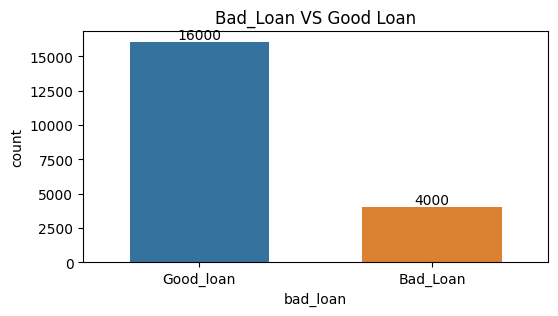

In [5]:
plt.figure(figsize =(6,3))
ax =sns.countplot(data = Lc,x=Lc['bad_loan'],width = .6,saturation =.70)
ax.bar_label(ax.containers[0])
plt.xticks([1,0],["Bad_Loan","Good_loan"])
plt.title("Bad_Loan VS Good Loan")
plt.show()

# **OUTCOME:** Here we  can see that  25% of the customers have the bad laon histroy  and 75% of the customers have the good loan histroy. Based on the results we will be
# carrying out the analysis including the relationship of various factors over the loan paying capability of the person who is applying for the loan in ourorganisation.

> Now as we ahve seen most of the customers  have the bad laon history and there are many factors that affects the Loan thus categorising it in bad loan and good loan Now we will be plotting a Heat Map  

In [138]:
Lc.columns


Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'purpose', 'term', 'last_delinq_none', 'revol_util',
       'total_rec_late_fee', 'od_ratio', 'bad_loan', 'annual_inc_Olfree',
       'dti_dummy'],
      dtype='object')

> **In this line i am setting up the data for the correlation ans i am excluding the unnessary column from the data so that we can clearly analyze the data and get the insights.**

In [139]:
corrln =Lc[[ 'emp_length_num'
       , 'last_delinq_none', 'revol_util',
       'total_rec_late_fee', 'od_ratio', 'bad_loan', 'annual_inc_Olfree',
       'dti_dummy']].corr()

> **I am using the heat map with the correlation to properly visualize the relations between variables in the data sets as you can see the max value is 1 along with the** **color scale here the negative values represent the negative corelation and vice versa.**

<function matplotlib.pyplot.show(close=None, block=None)>

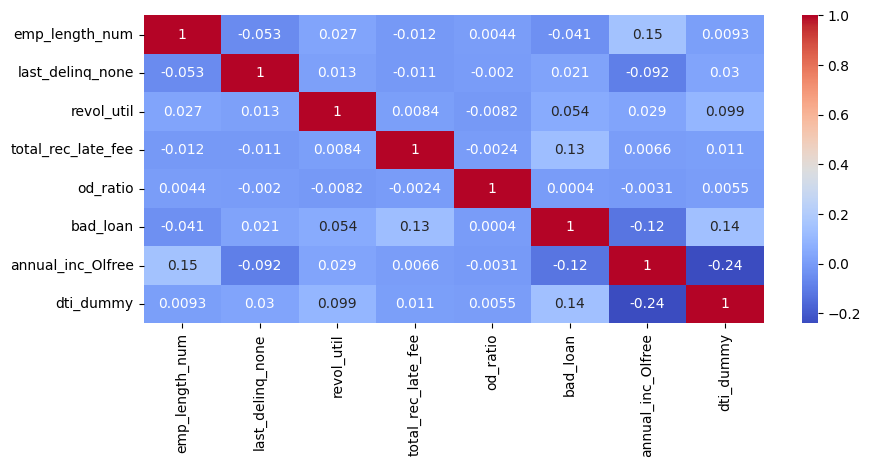

In [140]:
plt.figure(figsize=(10,4))

sns.heatmap(corrln,annot =True,cmap= 'coolwarm')
plt.show

> **From the below  figure we are analyzing the imapact of the Grade on the loan quality.**

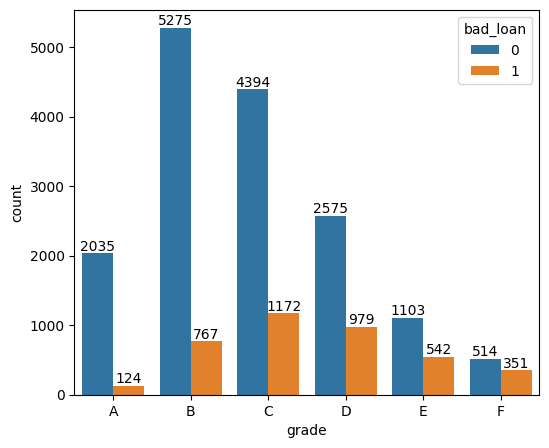

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
as_plot = sns.countplot(data=Lc, x='grade', hue='bad_loan', order=['A', 'B', 'C', 'D', 'E', 'F'])

# Add bar labels for each container
for container in as_plot.containers:
    as_plot.bar_label(container)

plt.show()


> # **OUTCOME**: Our team need to keep an strict eye on the Grade of the person who is applying for the loan specially if HE/SHE falls to the Grade catagory of E,C,D simimlarly the person falling in the catagory A has less chances of the loan defaults accordingly  we need to take the steps to prevent the loan default.

PIE chart helps in determining the portions.

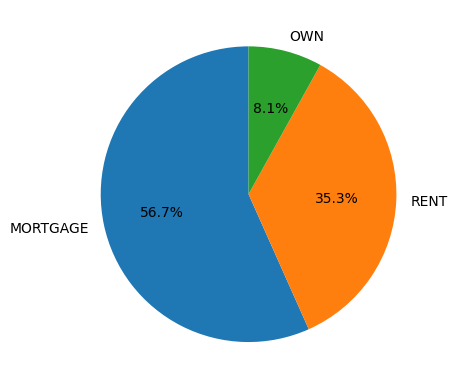

In [157]:

home_counts = Lc['home_ownership'].value_counts()
plt.pie(x =home_counts,labels =home_counts.index,autopct ='%1.1f%%',startangle =90)
plt.title("")
plt.show()

# > **OUTCOME**: The the person who  have mortgage  tend to apply for the loans more and then rent and from here we can seee that persons who have their own homes tens to aply less for the laon and this will help us to make customizable offers to the ech catagory.

Here we will be analyzing based on the home ownership who tends to apply for the loans more and defaults more

<Figure size 600x500 with 0 Axes>

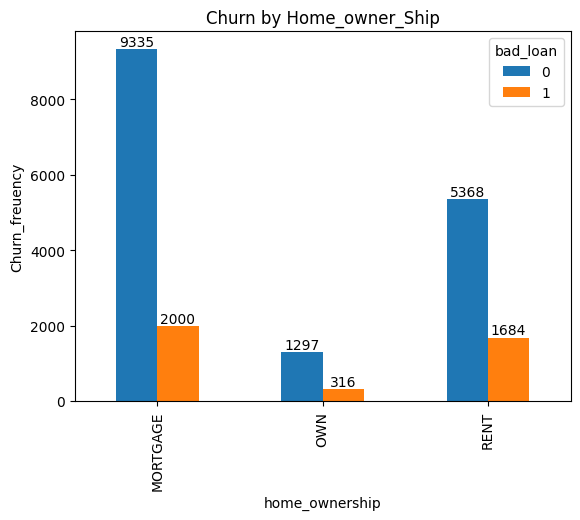

In [160]:
plt.figure(figsize =(6,5))
ab =pd.crosstab(Lc['home_ownership'],Lc['bad_loan']).plot(kind='bar')
ab.bar_label(ab.containers[0])
ab.bar_label(ab.containers[1])
plt.title('Churn by Home_owner_Ship')
plt.ylabel('Churn_freuency')
plt.show()

> **OUTCOME**:Higher-Risk-for-Renters: The highest default rate among renters (23%) suggests that this group poses a higher credit risk. Lenders might consider more stringent credit checks, higher interest rates, or require additional collateral for applicants in this category.
> Tailored Products: Develop specific loan products or offers tailored to each home ownership category. For example, create a loan product with terms that cater specifically to renters who have higher default risks, such as shorter loan terms or higher down payments.
> Incentives for Low-Risk Borrowers: Provide incentives such as lower interest rates or reduced fees for mortgage holders to attract more low-risk borrowers
Risk-Based Pricing: Implement risk-based pricing models where interest rates are adjusted based on the default risk associated with each home ownership category.
Loan Approval Criteria: Adjust loan approval criteria to factor in the higher default rates among renters. This might involve setting stricter income-to-debt ratios or higher credit score requirements for this grop.

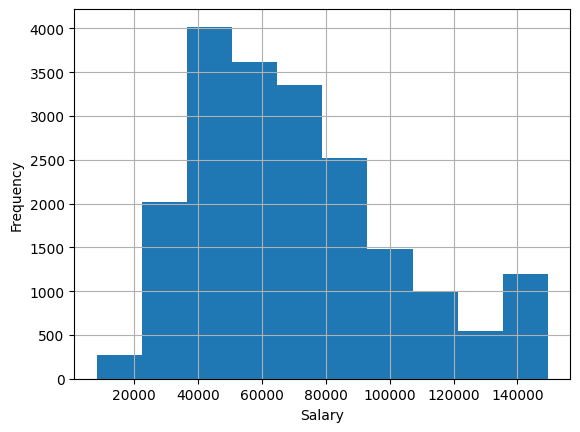

In [144]:
Lc['annual_inc_Olfree'].hist()
plt.xlabel("Salary")
plt.ylabel('Frequency')
plt.show()

In [147]:
Lc.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'purpose', 'term', 'last_delinq_none', 'revol_util',
       'total_rec_late_fee', 'od_ratio', 'bad_loan', 'annual_inc_Olfree',
       'dti_dummy'],
      dtype='object')

> **Here i am plotting the a regression plot to check how annual income effects the Loan type Bad or Good**

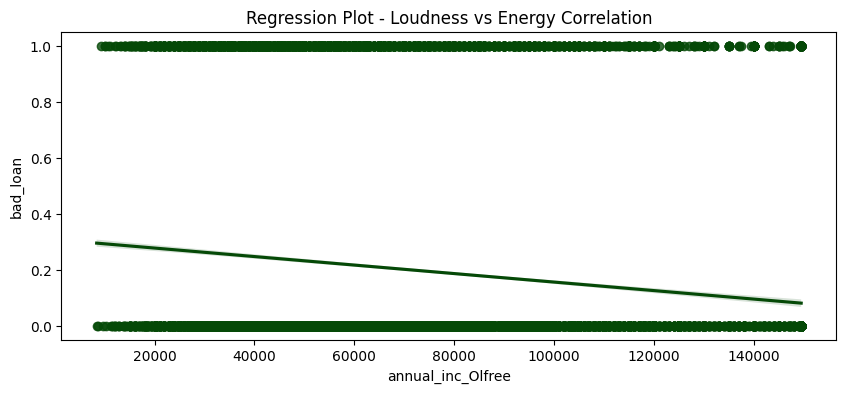

In [155]:
plt.figure(figsize=(10,4))
sns.regplot(data=Lc, y='bad_loan', x='annual_inc_Olfree', color='#054907').set(title='Regression Plot - Loudness vs Energy Correlation')
plt.show()

> # OUTCOME: we can see that as the salary annualy increases the risks of  defaulting the loan becomes less this enables us to take decision on providing the tailored interest rates for those persons who have higher salary.

> **Checking the term of the loan and its purpose**.

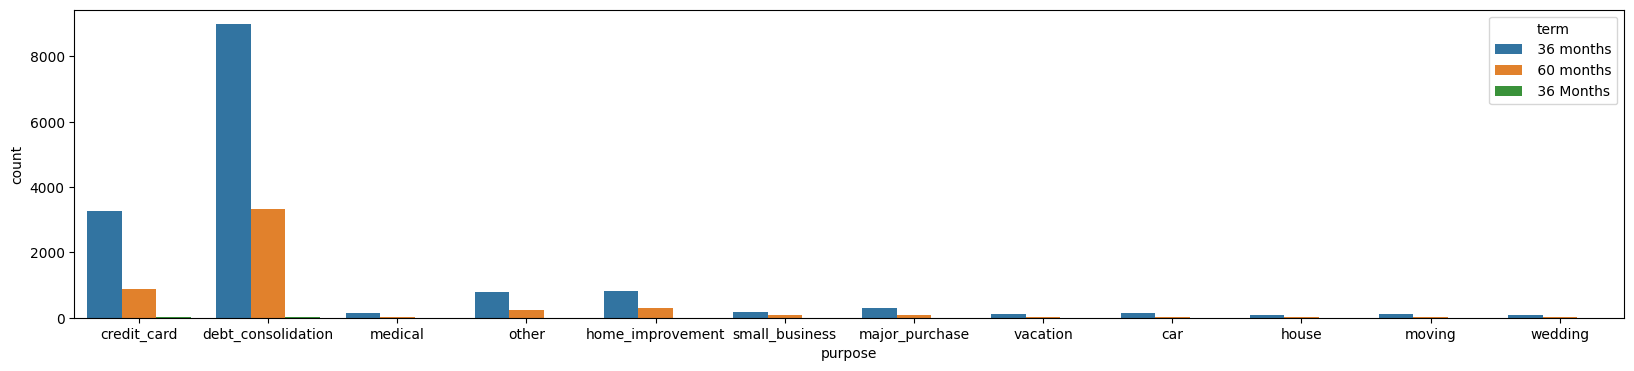

In [4]:
plt.figure(figsize=(20,4))
sns.countplot(data = Lc,x ='purpose',hue = 'term')
plt.show()

> **OUTCOME** : people falling in catagory credit card and debt-consolidation  tend to apply for the loan having the term 36 moonths and 60 months
The tendency of borrowers in the credit card and debt-consolidation categories to apply for loans with terms of 36 months and 60 months reveals important insights into their financial behavior and needs. By understanding these preferences, lenders can better tailor their loan products, marketing strategies, and risk assessment models to meet the needs of these borrowers while managing risk effectively. Additionally, providing financial education and debt management resources can help borrowers make more informed decisions, leading to better financial outcomes for both borrowers and lenders.
